# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = pd.DataFrame()
data = (json.loads(req.content.decode()))

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [ ]:
data
list = [5]
list[0] = data


{'items': [{'id': '77502259',
   'premium': False,
   'name': 'Junior Data scientist (NLP)',
   'department': None,
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': {'from': 100000, 'to': 150000, 'currency': 'RUR', 'gross': False},
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': 'Москва',
    'street': 'Усачёва улица',
    'building': '33с1',
    'lat': 55.723207,
    'lng': 37.561113,
    'description': None,
    'raw': 'Москва, Усачёва улица, 33с1',
    'metro': {'station_name': 'Лужники',
     'line_name': 'МЦК',
     'station_id': '95.535',
     'line_id': '95',
     'lat': 55.720278,
     'lng': 37.563056},
    'metro_stations': [{'station_name': 'Лужники',
      'line_name': 'МЦК',
      'station_id': '95.535',
      'line_id': '95',
      'lat': 55.720278,
      'lng': 37.563056},
     {'station_name': 'Спортивная',
      'line_name': 'Сокольническая',
    

Можем посмотреть на краткое описание первой вакансии

In [ ]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-02-23T13:01:29+0300',
 'created_at': '2023-02-23T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [ ]:
data['found']

266

Количество страниц в результатах поиска

In [ ]:
data['pages']

27

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [ ]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_id,address.metro.lat,address.metro.lng,address,employer.logo_urls,salary,department.id,department.name,insider_interview.id,insider_interview.url
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-02-23T13:01:29+0300,2023-02-23T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74257661,False,Data scientist,NaN,False,False,None,None,2023-02-23T15:02:29+0300,2023-02-23T15:02:29+0300,...,133,55.7232,37.5038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76925483,False,Data Scientist,NaN,False,False,None,None,2023-02-25T14:31:00+0300,2023-02-25T14:31:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77208642,False,Data Scientist middle+/Senior,NaN,False,False,None,None,2023-02-23T12:06:39+0300,2023-02-23T12:06:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77223284,False,Аналитик данных (Data Scientist) / ML-разработчик,NaN,False,False,None,None,2023-02-23T15:00:20+0300,2023-02-23T15:00:20+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [ ]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [ ]:
vacancy_info

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

---



Функция скраппинга по названию вакансии

In [ ]:
def set_params(profession, page, per_page, period):
  return {
    'text': profession,
    'area': 1,
    'page': page,
    'per_page': per_page,
    'period': period,
    'responses_count_enabled': True 
}

def scrapping(profession, per_page, period):
  req = requests.get(URL, set_params(profession, 0, per_page, period))
  data = (json.loads(req.content.decode()))
  sleep(0.5)
  len_pages = data['pages'] + 1
  
  list_vacancy = [0]*(len_pages)
  list_vacancy[0] = data

  for i in range(1, len_pages):
    req = requests.get(URL, set_params(profession, i, per_page, period))
    data = (json.loads(req.content.decode()))
    list_vacancy[i] = data
    sleep(0.5)

  return list_vacancy

Функция нормализации json-формата


In [ ]:
def normalizing_data(list_vacancy):
  data = pd.json_normalize(list_vacancy[0]['items'])
  len_pages = list_vacancy[0]['pages'] + 1
  if (len_pages > 20):
    len_pages = 20
  for i in range(1, len_pages):
    data = data.append(pd.json_normalize(list_vacancy[i]['items']), ignore_index=True)
  return data

Соберем информацию с API

In [ ]:
URL = 'https://api.hh.ru/vacancies'

#Листы с результатами скраппинга
list_DS = scrapping("Data scientist", 100, 30)
list_DS_short = scrapping("DS", 100, 30)

list_DA = scrapping("Data analyst", 100, 30)
list_DA_rus = scrapping("Аналитик данных", 100, 30)

#Dataframes после json-нормализации
data_DS = normalizing_data(list_DS)
data_DS_short = normalizing_data(list_DS_short)

data_DA = normalizing_data(list_DA)
data_DA_rus= normalizing_data(list_DA_rus)

#Собираем все в один DataFrame
data = data_DS.append(data_DA)
data = data.append(data_DS_short)
data = data.append(data_DA_rus)

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [ ]:
data.drop_duplicates(subset = 'id', inplace = True)

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

---



Функция скраппинга подробной информации о вакансии

In [105]:
def detail_vac(df):

  list_detail_vac = [0]*len(df)

  for i in range(len(df)):
    if i%50 == 0:
      print(i)
    vacancy = df['id'].iloc[i]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    list_detail_vac[i] = vacancy_info
    sleep(0.5)
  return list_detail_vac

Функция json-нормализации

In [85]:
def normalizing_detail_data(list_vacancy):
  data = pd.json_normalize(list_vacancy[0])
  for i in range(1, len(list_vacancy)):
    data = data.append(pd.json_normalize(list_vacancy[i]), ignore_index=True)
  return data

In [ ]:
lst = detail_vac(data)
detail_data = normalizing_detail_data(lst)

detail_data = detail_data[['id', 'name', 'key_skills', 'salary.from', 'salary.to',
       'salary.currency', 'salary.gross', 'address.city', 'address.street', 'address.building', 'address.lat',
       'address.lng', 'address.description', 'address.raw', 'address.metro',
       'address.metro_stations', 'experience.id', 'experience.name']]

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [ ]:
detail_data.to_excel("DS_detail_Data.xlsx")

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [ ]:
#Сохраним df с подробными вакансиями в csv, т.к. он долго выгружается
detail_data.to_csv("DS detail data.csv", encoding='utf-8', index=False)

print(len(detail_data))

3451


**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [ ]:
def popular_skills(detail_data):
  map = dict()
  data = detail_data.copy()
  data = data.dropna(subset=['key_skills'])
  for ind in data.index:
    for i in range(len(data['key_skills'][ind])):
      skill = data['key_skills'][ind][i]['name']
      map[skill] = map.get(skill, 0) + 1
  map = dict(sorted(map.items(), key=lambda item: item[1], reverse=True))
  skills = pd.DataFrame(map.items())
  skills.columns = ['Навыки', 'Частота']

  return skills

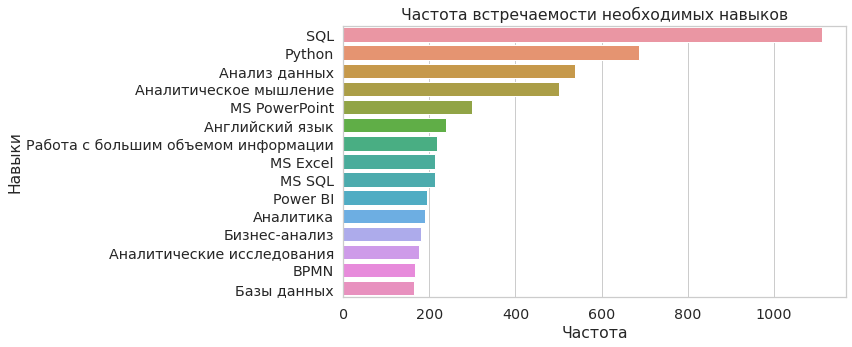

In [ ]:
skills = popular_skills(detail_data)

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.barplot(data=skills.head(15), y='Навыки', x='Частота')
    plt.title("Частота встречаемости необходимых навыков")

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [ ]:
def gross_currency_clean(detail_data):
  EUR_currency = 0.01247
  USD_currency = 0.01325
  data = detail_data.copy()

  nan_from_lst = data['salary.from'].isna()
  nan_to_lst = data['salary.to'].isna()

  for ind in data.index:
    if (nan_from_lst[ind]):
      if (nan_to_lst[ind]):
        continue
      else:
        data['salary.from'][ind] = data['salary.to'][ind]
    else:
      if not(nan_to_lst[ind]):
        data['salary.from'][ind] = (data['salary.from'][ind] + 
                                    data['salary.to'][ind])/2

    if (data['salary.gross'][ind] == True):
      data['salary.gross'][ind] = False
      data['salary.from'][ind] *= 0.87
    
    if (data['salary.currency'][ind] == 'USD'):
      data['salary.from'][ind] *= USD_currency

    if (data['salary.currency'][ind] == 'EUR'):
      data['salary.from'][ind] *= EUR_currency
    
  data = data.dropna(subset=['salary.from'])

  return data

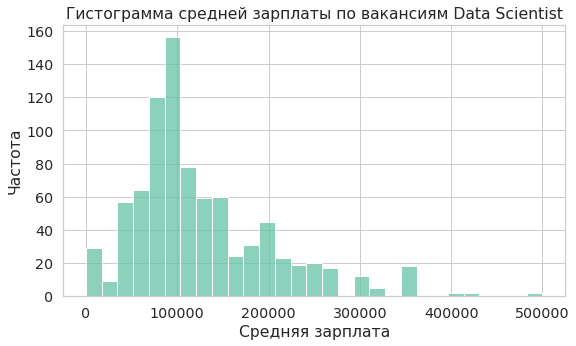

In [ ]:
normalized_salary = gross_currency_clean(detail_data)

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=normalized_salary, x='salary.from')
    plt.xlabel('Средняя зарплата')
    plt.ylabel('Частота')
    plt.title('Гистограмма средней зарплаты по вакансиям Data Scientist')

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Исследуем вакансии профессии "Java-разработчик"

---



Соберем информацию с API

In [ ]:
URL = 'https://api.hh.ru/vacancies'

#Листы с результатами скраппинга
list_JD = scrapping("Java developer", 100, 30)

list_JD_rus = scrapping("Java разработчик", 100, 30)
list_JD_rus_old = scrapping("Java программист", 100, 30)

#Dataframes после json-нормализации
data_JD = normalizing_data(list_JD)
data_JD_rus = normalizing_data(list_JD_rus)
data_JD_rus_old = normalizing_data(list_JD_rus_old)


#Собираем все в один DataFrame
data = data_JD.append(data_JD_rus)
data = data.append(data_JD_rus_old)

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалим дубликаты.

In [ ]:
data.drop_duplicates(subset = 'id', inplace = True)

Выгрузим подробное описание каждой найденной вакансии

In [ ]:
lst = detail_vac(data)
detail_java_data = normalizing_detail_data(lst)
data = data.reset_index()
detail_java_data['counters.responses'] = data['counters.responses']
detail_java_data = detail_java_data[['id', 'name', 'key_skills', 'salary.from', 'salary.to',
       'salary.currency', 'salary.gross', 'address.city', 'address.street', 'address.building', 'address.lat',
       'address.lng', 'address.description', 'address.raw', 'address.metro',
       'address.metro_stations', 'experience.id', 'experience.name', 'employer.name', 'counters.responses']]


**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [130]:
detail_java_data.to_excel("Java_detail_Data.xlsx")

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [ ]:
detail_java_data.to_csv("Java detail data.csv", encoding='utf-8', index=False)
print(len(detail_java_data))

2481


**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

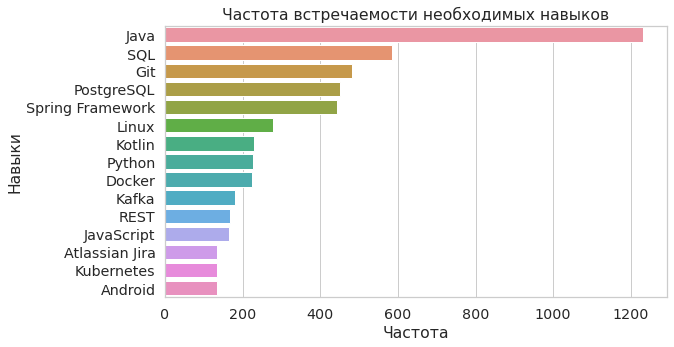

In [ ]:
#detail_data = pd.read_csv('FINAL data hhru.csv')

skills = popular_skills(detail_java_data)

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.barplot(data=skills.head(15), y='Навыки', x='Частота')
    plt.title("Частота встречаемости необходимых навыков")

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

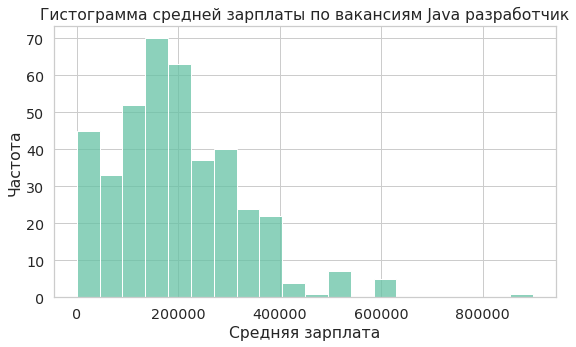

In [ ]:
normalized_salary = gross_currency_clean(detail_java_data)

with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=normalized_salary, x='salary.from')
    plt.xlabel('Средняя зарплата')
    plt.ylabel('Частота')
    plt.title('Гистограмма средней зарплаты по вакансиям Java разработчик')

**Выводы.**

*По графикам необходимых навыков*:

Из графика для вакансий "Data Scientist" (DS) можно увидеть, что большинство умений в топ-15 имеют не технологический характер, а аналитический. Чаще всего требуют знать Python и SQL - логично, ведь нужно работать с данными. Можно увидеть требования знания английского, т.к. большая чась технической литературы и статей именно на нем. На фоне этого очень интересно наблюдать за таким же графиком по вакансиям Java developer (JD). Там встречаются исключительно требования к стеку кандидата - Java, Postgre, git и так далее. Можно сделать выводы, что думать на этой должности надо меньше, но иметь большой прикладной опыт и обширные знания.

*По графикам средней зарплаты*:

Здесь можно заметить, что самая частая предлагаемая ставка у Java разработчика выше, чем у Data Scientist(190.000 против 100.000), как и максимальная зп (800.000 против 500.000). Во второй части задания можно будет ответить, чем вызван такой разрыв. 

Впрочем стоит заметить, что для DS пик ставки по частоте в 100.000 гораздо более явный, чем для JD - отличия почти в два раза. 
Это говорит о следующем: шанс встретить ставку в 100к у DS гораздо выше, чем ставку в 190к у JD 


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


**Задание №1** Какой опыт требуется для вакансии Java developer?

In [ ]:
def experience(detail_data):
  map = dict()
  data = detail_data.copy()
  data.is_copy = False

  data = data.dropna(subset=['experience.id'])
  for ind in data.index:
    exp = data['experience.id'][ind]
    map[exp] = map.get(exp, 0) + 1

  map = dict(sorted(map.items(), key=lambda item: item[1], reverse=True))
  experience = pd.DataFrame(map.items())
  experience.columns = ['Требуемый опыт', 'Частота']

  experience.loc[experience['Требуемый опыт'] == 'between1And3', 'Требуемый опыт'] = 'От 1 до 3 лет'
  experience.loc[experience['Требуемый опыт'] == 'between3And6', 'Требуемый опыт'] = 'От 3 до 6 лет'
  experience.loc[experience['Требуемый опыт'] == 'moreThan6', 'Требуемый опыт'] = 'Больше 6 лет'
  experience.loc[experience['Требуемый опыт'] == 'noExperience', 'Требуемый опыт'] = 'Без опыта'

  return experience

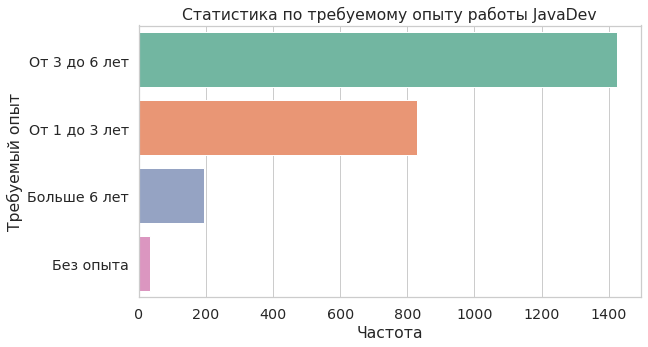

In [ ]:
java_data_from_csv = pd.read_csv('Java detail data.csv')

java_data_from_csv['experience.id'].unique()

exp = experience(java_data_from_csv)
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.barplot(data=exp, y='Требуемый опыт', x='Частота')
    plt.title("Статистика по требуемому опыту работы JavaDev")

**Задание №2** Какие работодатели в топе?

Будем считать, что работодатель в топе, если количество откликов на вакансию максимально. Найдем 15 таких компаний c помощью дополнительного поля counters.responses.

In [129]:
def max_response(data):
  func = data.copy()
  func = func.sort_values(by=['counters.responses'])
  return func['employer.name'].head(15).to_list()
print(max_response(detail_java_data))

['Международный аэропорт Шереметьево', 'X5 Tech', 'Центр корпоративных решений', 'SberTech', 'ГКУ города Москвы Центр занятости населения города Москвы', 'МультиКарта', 'ЛАНИТ', 'СБЕР', 'R-Style Softlab (Эр-Стайл Софтлаб)', 'СИБУР, Группа компаний', '1С', 'FundCount', 'Иннотех, Группа компаний', 'Центр Орбита', 'МегаФон']


**Задание №3** В каком районе Москвы вакансия пользуется наибольшим и наименьшим спросом?

Удалим пустые адреса и нанесем координаты на интерактивную карту. Файл прикреплен к готовой работе с названием rating_colors_java_map.html

Проанализировав данные, можем понять, что если вакансия не имеет координат, следовательно, адрес ее не указан

In [ ]:
import folium

#Удаляем пустые адреса
java_data_from_csv_adress = java_data_from_csv.dropna(subset=['address.lat'])

def color_change(elev):
    if(0 <= elev <= 80000):
        return('red')
    elif(80000 <= elev < 250000):
        return('yellow')
    else:
        return('green')

MSC_loc = [55.7522, 37.6156]

map = folium.Map(location = MSC_loc, zoom_start = 11)
for ind in java_data_from_csv_adress.index:
    folium.CircleMarker(location = [java_data_from_csv_adress['address.lat'][ind], java_data_from_csv_adress['address.lng'][ind]], 
                        radius = 0.5, color = color_change(java_data_from_csv_adress['salary.from'][ind]), opacity = 0.8).add_to(map)
map.save("rating_colors_java_map.html")

Какие выводы можно сделать из построенных графиков?

**Задание №1**

---

Самыми востребованными специалистами на рынке труда являются разработчики с опытом от 3 до 6 лет, их называют Middle-разработчиками. Стажеров без опыта почти не ищут. Также весьма логичны данные о senior-специалистах с опытом свыше 6 лет: таких вакансий тоже немного, т.к. такие сотрудники стоят дорого и нечасто меняют место работы.

**Задание №2**

---

В топе компаний по количеству откликов на вакансии находятся аэропорт Шереметьево, X5 group, СберТех и другие крупные корпорации. Также туда затесался центр занятости г. Москва, что логично, т.к. он публикует много открытых вакансий малых компаний. Также странным может показаться нахождение Шереметьево во главе этого списка, однако известно, что после изъятия коммерческой лицензии на немецкие ERP системы компании пришлось в срочном порядке нанимать большое количество Java разработчиков.

**Задание №3**

---



Во-первых, подавляющее большинство компаний, ищущих Java-специалистов, находятся внутри МКАДа. 

Во-вторых, можно заметить три скопления вакансий. Самое крупное из них находится в Москве-Сити, что весьма логично, остальные можно заметить у Беларусского и Савеловского вокзалов.

В третьих, подсветив точки на карте в зависимости от предлагаемой зарплаты, увидим, что высокие ставки распределены равномерно по всему центру. Однако чем дальше от центра, тем заметнее преобладание низких ставок з\п над высокими.